1)  Location And Number of fundings

City Location  	      |   Number of Fundings

Bangalore             |        635
Mumbai                |        449
NCR                   |        709


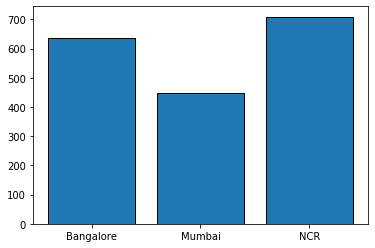

In [60]:

import matplotlib.pyplot as plt
import numpy as np
import csv
with open("startup_funding.csv",encoding='utf8') as filename:
    filedata=csv.DictReader(filename,skipinitialspace=True)
    cityloc=[]
    for row in filedata:
        cityloc.append(row['CityLocation'])
    cityloc=np.array(cityloc)
    cityloc=cityloc[cityloc != '']
    
    for i in range(len(cityloc)):
        cityloc[i]=cityloc[i].split('/')[0].strip()
    
    for i in range(len(cityloc)):
        if cityloc[i]=='bangalore':
            cityloc[i]='Bangalore'
        if cityloc[i]=='Delhi' or cityloc[i]=='New Delhi' or cityloc[i]=='Noida' or cityloc[i]=='Gurgaon':
            cityloc[i]='NCR'
        
    dict={}
    for i in cityloc:
        if i=="Bangalore" or i=='Mumbai' or i=='NCR':
            if i in dict:
                dict[i]+=1
            else:
                dict[i]=1
    city=[]
    nof=[]
    for i in dict:
        city.append(i)
        nof.append(dict[i])
    print("City Location  \t      |   Number of Fundings")
    print()
    for i in range(3):
        print('{:<22s}|{:>11d}'.format(city[i],nof[i]))
        
    plt.bar(city,nof,edgecolor='Black')
    plt.show()

2) Top 5 investors who have invested maximum number of times (considered repeat investments in one company)

Investors  	      |   No of times invested

Sequoia Capital       |         64
Accel Partners        |         53
Kalaari Capital       |         44
SAIF Partners         |         41
Indian Angel Network  |         40


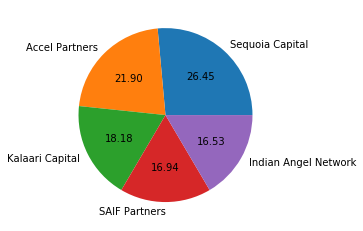

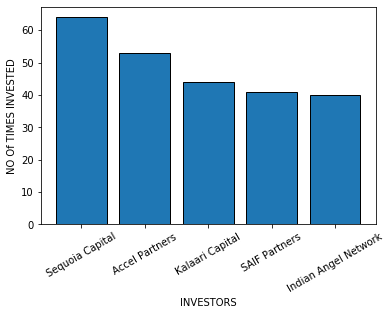

In [5]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
with open("startup_funding.csv",encoding='utf8') as filename:
    inv=[]
    start=csv.DictReader(filename,skipinitialspace=True)
    for i in start:
        if i['InvestorsName']!='Undisclosed investors' and i['InvestorsName']!='' and i['InvestorsName']!='Undisclosed Investor':
                for j in i['InvestorsName'].split(','):
                    inv.append(j.strip())
    dict={}
    for i in inv:
        if i in dict:
            dict[i]+=1
        else:
            dict[i]=1
    names=[]
    times=[]
    for i in dict:
        names.append(i)
        times.append(dict[i])
    npnames=np.array(names)
    nptimes=np.array(times)
    maxi=npnames[nptimes.argsort()[::-1]]
    values=np.sort(nptimes)[::-1]
    print("Investors  \t      |   No of times invested")
    print()
    for i in range(5):
        print('{:<22s}|{:>11d}'.format(maxi[i],values[i]))
    maxi=maxi[:5]
    values=values[:5]
    plt.pie(values,labels=maxi,autopct="%.2f")
    plt.show()
    plt.bar(maxi,values,edgecolor='Black')
    plt.xlabel('INVESTORS')
    plt.ylabel('NO Of TIMES INVESTED')
    plt.xticks(rotation=30)
    plt.show()
        
        

3)  Top 5 investors who have invested maximum number of times in different companies. 

Investor  	      |   No of times invested

Sequoia Capital       |         48
Accel Partners        |         47
Kalaari Capital       |         41
Indian Angel Network  |         40
Blume Ventures        |         36



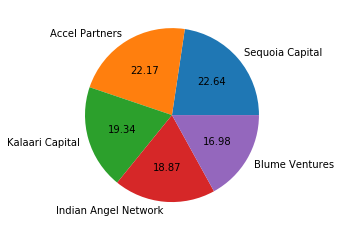

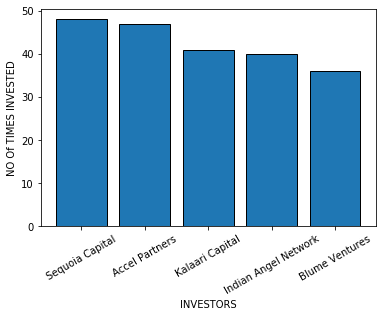

In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
df=data.copy()
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investors','',inplace=True)
df['StartupName'].fillna('Unknown',inplace=True)
df['InvestorsName'].fillna('Unknown',inplace=True)
sname=df['StartupName']
iname=df['InvestorsName']
dict={}
i=0
for ele in iname:
    p=str(ele)
    q=p.split(",")
    for e in q:
        e=e.strip()
        if e in dict:
            dict[e]+=[sname[i]]
        else:
            dict[e]=[sname[i]]
    i=i+1

for ele in dict:
    dict[ele]=len(set(dict[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in dict:
        if ele!="":
            if max<dict[ele]:
                max=dict[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del dict[ct]
print("Investor  \t      |   No of times invested")
print()
for i in range(5):
    print('{:<22s}|{:>11d}'.format(investor[i],count[i]))
print()
color=['Blue','Orange','Green','Red','Purple']
plt.pie(count,labels=investor,autopct="%.2f")
plt.show()
plt.bar(investor,count,edgecolor='Black')
plt.xlabel('INVESTORS')
plt.ylabel('NO Of TIMES INVESTED')
plt.xticks(rotation=30)
plt.show()

4) Top 5 investors who have invested maximum number of times in different companies with Seed or Crowd Fundings.

Investor  	      |   No_of_times_invested

Indian Angel Network  |         33
Rajan Anandan         |         23
LetsVenture           |         16
Anupam Mittal         |         16
Kunal Shah            |         14



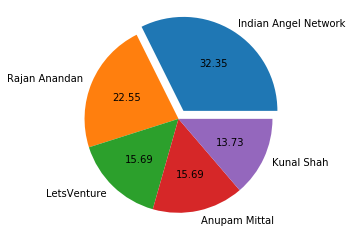

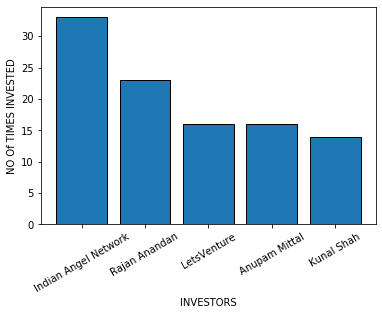

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
df=data.copy()
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investors','',inplace=True)
df['StartupName'].fillna('Unknown',inplace=True)
df['InvestorsName'].fillna('Unknown',inplace=True)
df['InvestmentType'].fillna('Unknown',inplace=True)
sname=df['StartupName']
irname=df['InvestorsName']
itype=df['InvestmentType']
dict={}
i=0
for ele in irname:
    p=str(ele)
    rows=p.split(",")
    for element in rows:
        element=element.strip()
        if itype[i]=='Seed Funding' or itype[i]=='Crowd Funding':
            if element in dict:
                dict[element]+=[sname[i]]
            else:
                dict[element]=[sname[i]]
    i=i+1

for ele in dict:
    dict[ele]=len(set(dict[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in dict:
        if ele!="":
            if max<dict[ele]:
                max=dict[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del dict[ct]
print("Investor  \t      |   No_of_times_invested")
print()
for i in range(5):
    print('{:<22s}|{:>11d}'.format(investor[i],count[i]))
print()
plt.pie(count,labels=investor,explode=[0.1,0,0,0,0],autopct="%.2f")
plt.axis('equal')
plt.show()
plt.bar(investor,count,edgecolor='Black')
plt.xlabel('INVESTORS')
plt.ylabel('NO Of TIMES INVESTED')
plt.xticks(rotation=30)
plt.show()


5) Top 5 investors who have invested maximum number of times in different companies with Private Equity.

Investor  	      |   No_of_times_invested

Sequoia Capital       |         45
Accel Partners        |         43
Kalaari Capital       |         35
Blume Ventures        |         27
SAIF Partners         |         24



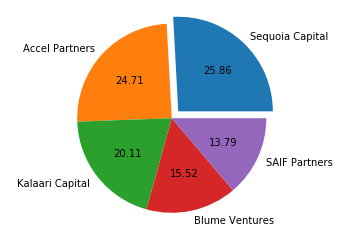

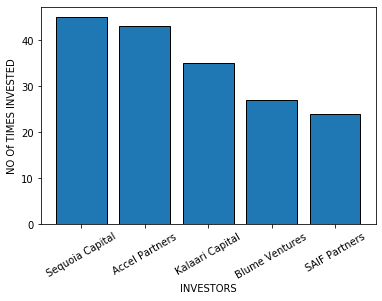

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
df=data.copy()
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investors','',inplace=True)
df['StartupName'].fillna('Unknown',inplace=True)
df['InvestorsName'].fillna('Unknown',inplace=True)
df['InvestmentType'].fillna('Unknown',inplace=True)
sname=df['StartupName']
irname=df['InvestorsName']
itype=df['InvestmentType']
dict={}
i=0
for ele in irname:
    p=str(ele)
    rows=p.split(",")
    for element in rows:
        element=element.strip()
        if itype[i]=='Private Equity':
            if element in dict:
                dict[element]+=[sname[i]]
            else:
                dict[element]=[sname[i]]
    i=i+1

for ele in dict:
    dict[ele]=len(set(dict[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in dict:
        if ele!="":
            if max<dict[ele]:
                max=dict[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del dict[ct]
print("Investor  \t      |   No_of_times_invested")
print()
for i in range(5):
    print('{:<22s}|{:>11d}'.format(investor[i],count[i]))
print()
plt.pie(count,labels=investor,explode=[0.1,0,0,0,0],autopct="%.2f")
plt.axis('equal')
plt.show()
plt.bar(investor,count,edgecolor='Black')
plt.xlabel('INVESTORS')
plt.ylabel('NO Of TIMES INVESTED')
plt.xticks(rotation=30)
plt.show()